# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from scipy import stats

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

# Get today's date as a string
today = pd.Timestamp.today().strftime('%Y-%m-%d')

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

print(cities)


Number of cities in the list: 601
['qaqortoq', 'west island', 'lompoc', 'chibougamau', 'cockburn town', "mil'kovo", 'bethel', 'afaahiti', 'sanming', 'freetown', 'puerto natales', 'jamestown', 'grytviken', 'mount gambier', 'gao', 'berdigestyakh', 'denia', 'albany', 'taiohae', 'kuqa', "ivdel'", 'anaco', 'edinburgh of the seven seas', 'blackmans bay', 'stanley', 'puerto san carlos', 'usinsk', 'badger', 'georgetown', 'port-aux-francais', 'ilulissat', "la'ie", 'ribeira grande', 'manaquiri', 'arraial do cabo', 'sitangkai', 'isafjordur', 'ryotsu-minato', 'tiksi', 'sinabang', 'mugia', 'borogontsy', 'adamstown', 'wailua homesteads', 'shinas', 'kalundborg', 'margaret river', 'longyearbyen', 'quincy', 'saipan', 'wenchang', 'abepura', 'laojunmiao', 'constantia', 'ushuaia', 'fortuna', 'bredasdorp', 'aljezur', 'falaise', 'atafu village', 'ballito', 'walvis bay', 'galliano', 'talnakh', 'urangan', 'anadyr', 'novohrad-volynskyi', 'yugorsk', 'remire-montjoly', 'cornu luncii', 'bilibino', 'alaghsas', 'in

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"


# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0
        
    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&units=metric&q={city}"
    
    #print(city_url)

    # Get city weather response
    city_response = requests.get(city_url)
    #print(city_response)
    
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date_unformatted = city_weather['dt']
        city_date_struct = time.localtime(city_date_unformatted) # Raw format for the api call
        city_date = time.strftime('%Y-%m-%d', city_date_struct) # Formatted so readable to humans
    
    
        # Append the City information into city_data list
        city_data.append({"City": city, 
                        "Lat": city_lat, 
                        "Lng": city_lng, 
                        "Max Temp": city_max_temp,
                        "Humidity": city_humidity,
                        "Cloudiness": city_clouds,
                        "Wind Speed": city_wind,
                        "Country": city_country,
                        "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
    pass
        
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | qaqortoq
Processing Record 2 of Set 1 | west island
Processing Record 3 of Set 1 | lompoc
Processing Record 4 of Set 1 | chibougamau
Processing Record 5 of Set 1 | cockburn town
Processing Record 6 of Set 1 | mil'kovo
Processing Record 7 of Set 1 | bethel
Processing Record 8 of Set 1 | afaahiti
Processing Record 9 of Set 1 | sanming
Processing Record 10 of Set 1 | freetown
Processing Record 11 of Set 1 | puerto natales
Processing Record 12 of Set 1 | jamestown
Processing Record 13 of Set 1 | grytviken
Processing Record 14 of Set 1 | mount gambier
Processing Record 15 of Set 1 | gao
Processing Record 16 of Set 1 | berdigestyakh
Processing Record 17 of Set 1 | denia
Processing Record 18 of Set 1 | albany
Processing Record 19 of Set 1 | taiohae
City not found. Skipping...
Processing Record 20 of Set 1 | kuqa
Processing Record 21 of Set 1 | ivdel'
Processing Record 22 of Set 1 | anaco
Processing Reco

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

print(city_data_df)

              City      Lat       Lng  Max Temp  Humidity  Cloudiness  \
0         qaqortoq  60.7167  -46.0333      3.58        98         100   
1      west island -12.1568   96.8225     26.99        74          75   
2           lompoc  34.6391 -120.4579     22.66        91         100   
3      chibougamau  49.9168  -74.3659     18.79        63         100   
4    cockburn town  21.4612  -71.1419     28.03        83         100   
..             ...      ...       ...       ...       ...         ...   
570           soio  -6.1349   12.3689     23.00        83          25   
571        jiuquan  39.7432   98.5174     21.40        19          80   
572      sarykemer  43.0000   71.5000     19.71        40          38   
573       tartouss  34.8890   35.8866     25.71        77           0   
574   sungai penuh  -2.0833  101.3833     18.84        97          97   

     Wind Speed Country        Date  
0          0.99      GL  2024-06-08  
1          3.60      CC  2024-06-08  
2        

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,qaqortoq,60.7167,-46.0333,3.58,98,100,0.99,GL,2024-06-08
1,west island,-12.1568,96.8225,26.99,74,75,3.60,CC,2024-06-08
2,lompoc,34.6391,-120.4579,22.66,91,100,5.66,US,2024-06-08
3,chibougamau,49.9168,-74.3659,18.79,63,100,3.09,CA,2024-06-08
4,cockburn town,21.4612,-71.1419,28.03,83,100,6.33,TC,2024-06-08


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,qaqortoq,60.7167,-46.0333,3.58,98,100,0.99,GL,2024-06-08
1,west island,-12.1568,96.8225,26.99,74,75,3.60,CC,2024-06-08
2,lompoc,34.6391,-120.4579,22.66,91,100,5.66,US,2024-06-08
3,chibougamau,49.9168,-74.3659,18.79,63,100,3.09,CA,2024-06-08
4,cockburn town,21.4612,-71.1419,28.03,83,100,6.33,TC,2024-06-08


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

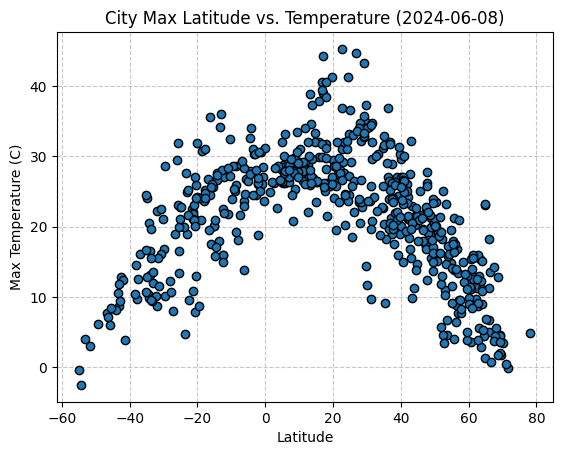

In [8]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df['Lat']
y_values = city_data_df['Max Temp']

# Incorporate the other graph properties
plt.scatter(x_values,y_values, edgecolors='black')
plt.title(f"City Max Latitude vs. Temperature ({today})") 
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.grid(linestyle='--', alpha=0.7) 
plt.gca().set_axisbelow(True) 

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

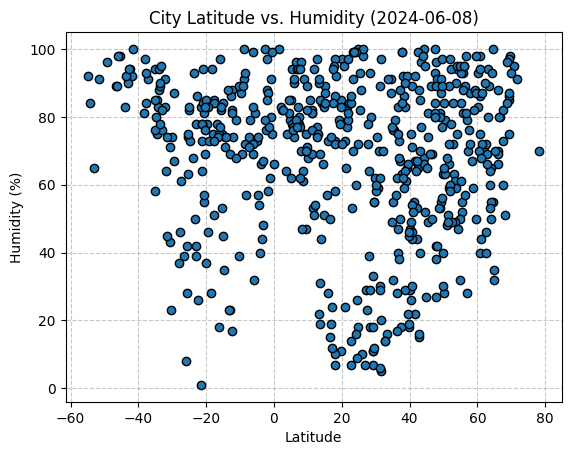

In [9]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df['Lat']
y_values = city_data_df['Humidity']

# Incorporate the other graph properties
plt.scatter(x_values,y_values, edgecolors='black')
plt.title(f"City Latitude vs. Humidity ({today})") 
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(linestyle='--', alpha=0.7) 
plt.gca().set_axisbelow(True) 

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

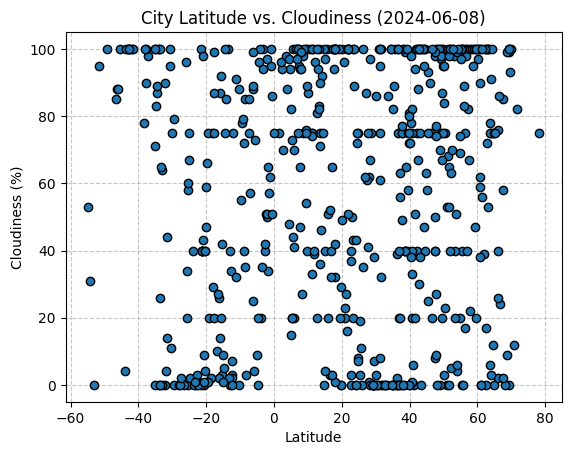

In [10]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df['Lat']
y_values = city_data_df['Cloudiness']

# Incorporate the other graph properties
plt.scatter(x_values,y_values, edgecolors='black')
plt.title(f"City Latitude vs. Cloudiness ({today})") 
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(linestyle='--', alpha=0.7) 
plt.gca().set_axisbelow(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

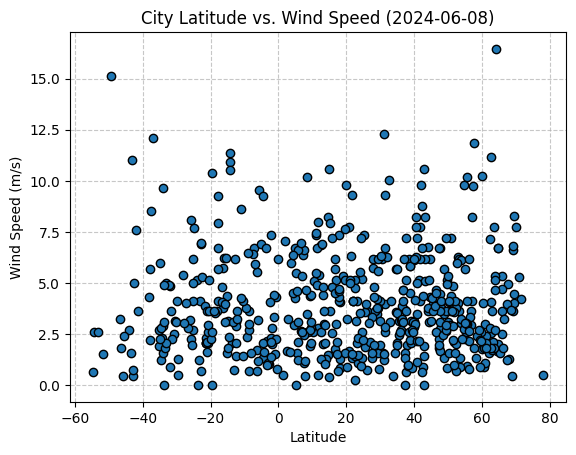

In [11]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df['Lat']
y_values = city_data_df['Wind Speed']

# Incorporate the other graph properties
plt.scatter(x_values,y_values, edgecolors='black')
plt.title(f"City Latitude vs. Wind Speed ({today})") 
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.grid(linestyle='--', alpha=0.7) 
plt.gca().set_axisbelow(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots

def create_linear_regression(x, y, x_titles, y_titles):
    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
  

    print("r-value  : ", r_value, "\np-value  : ", p_value, "\nstd-error: ", std_err)

    regress_values = x * slope + intercept
    #print(regress_values)
    
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    print(line_eq)

# Create Plot
    plt.scatter(x,y, edgecolors='black')
    plt.title(f"{x_titles} vs. {y_titles} ({today})") 
    plt.plot(x,regress_values,"r-")

# Label plot and annotate the line equation
    plt.xlabel(x_titles)
    plt.ylabel(y_titles)
    plt.grid(linestyle='--', alpha=0.7) 
    plt.gca().set_axisbelow(True)
    plt.annotate(line_eq,(20,5),fontsize=15,color="red")

# Show plot
    plt.show()


In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >=0]

# Display sample data
northern_hemi_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,qaqortoq,60.7167,-46.0333,3.58,98,100,0.99,GL,2024-06-08
2,lompoc,34.6391,-120.4579,22.66,91,100,5.66,US,2024-06-08
3,chibougamau,49.9168,-74.3659,18.79,63,100,3.09,CA,2024-06-08
4,cockburn town,21.4612,-71.1419,28.03,83,100,6.33,TC,2024-06-08
5,mil'kovo,55.6078,37.7956,21.22,52,40,0.94,RU,2024-06-08


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,west island,-12.1568,96.8225,26.99,74,75,3.60,CC,2024-06-08
7,afaahiti,-17.7500,-149.2833,23.93,85,99,7.95,PF,2024-06-08
10,puerto natales,-51.7236,-72.4875,3.00,91,95,1.51,CL,2024-06-08
12,grytviken,-54.2811,-36.5092,-2.48,84,31,2.60,GS,2024-06-08
13,mount gambier,-37.8333,140.7667,9.77,84,90,2.21,AU,2024-06-08


###  Temperature vs. Latitude Linear Regression Plot

r-value  :  -0.7664942953925022 
p-value  :  6.810213685918991e-80 
std-error:  0.015332569137108691
y = -0.37x + 35.57


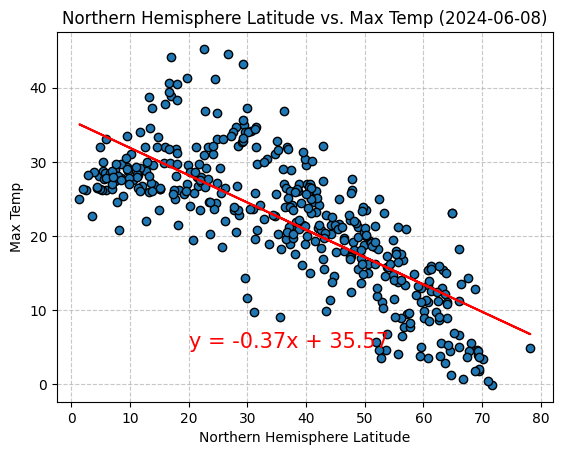

In [15]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']

create_linear_regression(x_values, y_values, 'Northern Hemisphere Latitude', 'Max Temp' )

r-value  :  0.7522948705421721 
p-value  :  6.743491464629403e-32 
std-error:  0.030500442424498724
y = 0.45x + 29.69


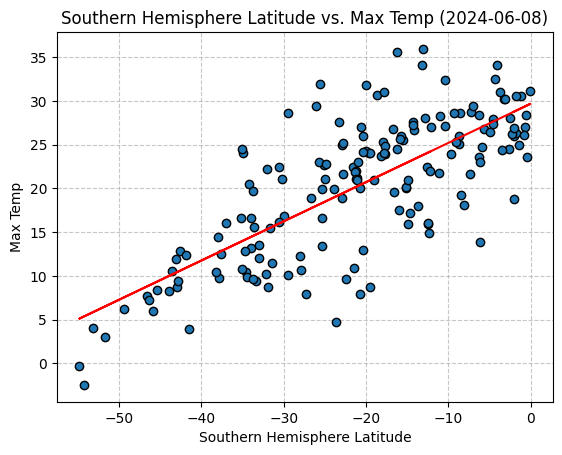

In [16]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']

create_linear_regression(x_values, y_values, 'Southern Hemisphere Latitude','Max Temp')

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

r-value  :  0.03935377539979205 
p-value  :  0.428478761634309 
std-error:  0.06505621142493631
y = 0.05x + 64.68


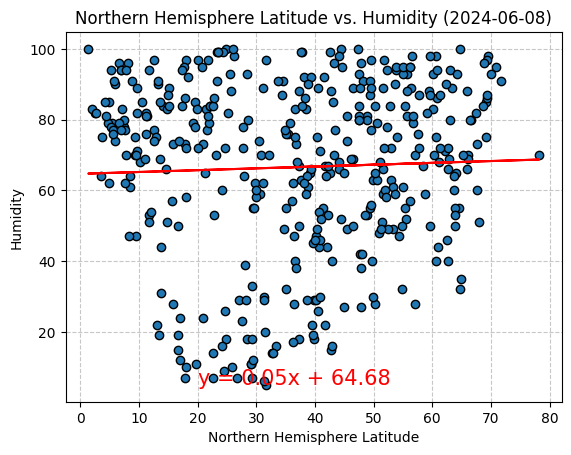

In [17]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']

create_linear_regression(x_values, y_values, 'Northern Hemisphere Latitude', 'Humidity')

r-value  :  -0.19048515414566453 
p-value  :  0.013389990382173804 
std-error:  0.11822328078852187
y = -0.3x + 66.15


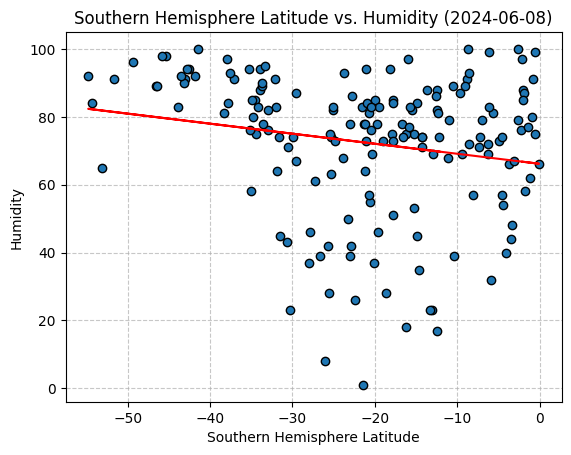

In [18]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']

create_linear_regression(x_values, y_values, 'Southern Hemisphere Latitude','Humidity')

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

r-value  :  -0.008260640145285514 
p-value  :  0.8680448683801989 
std-error:  0.09798429240224425
y = -0.02x + 60.21


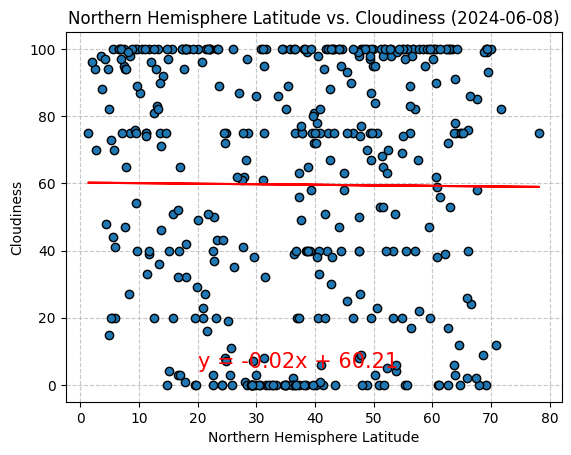

In [19]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']

create_linear_regression(x_values, y_values, 'Northern Hemisphere Latitude', 'Cloudiness')

r-value  :  -0.12223694166091492 
p-value  :  0.11445814155123539 
std-error:  0.21828210155325967
y = -0.35x + 43.1


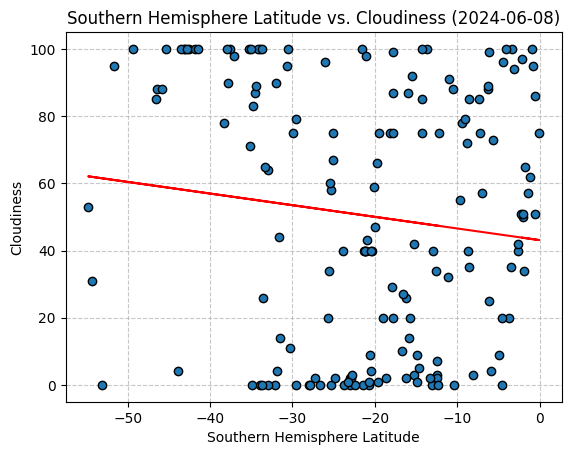

In [20]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']

create_linear_regression(x_values, y_values, 'Southern Hemisphere Latitude','Cloudiness')

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

r-value  :  0.0035466877237124474 
p-value  :  0.9431336132997568 
std-error:  0.00633420737421396
y = 0.0x + 3.86


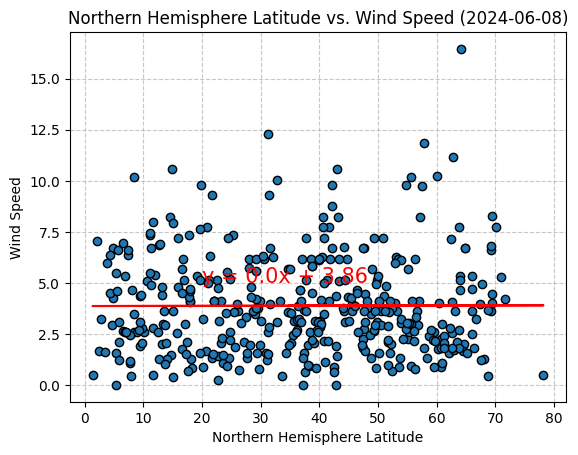

In [21]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']

create_linear_regression(x_values, y_values, 'Northern Hemisphere Latitude', 'Wind Speed')

r-value  :  -0.006663774415108003 
p-value  :  0.931682265309709 
std-error:  0.015599036520310708
y = -0.0x + 3.77


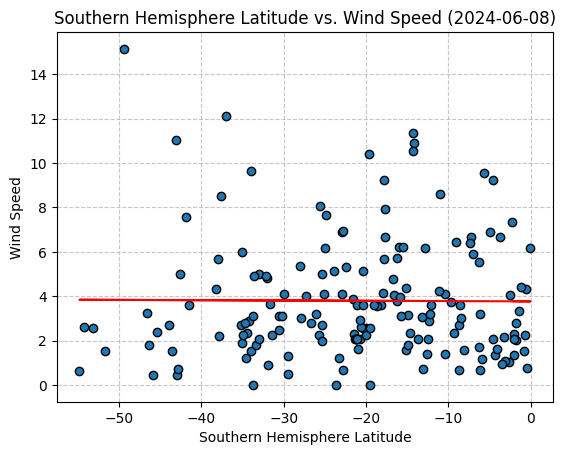

In [22]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']

create_linear_regression(x_values, y_values, 'Southern Hemisphere Latitude','Wind Speed')

**Discussion about the linear relationship:** YOUR RESPONSE HERE